In [103]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy  as np

In [104]:
url = 'https://www.espn.com.co/futbol/posiciones/_/liga/fifa.world'

In [105]:
page = requests.get(url)

In [106]:
soup = BeautifulSoup(page.content,'html.parser')

In [107]:
#nombres
ju = soup.find_all('span',class_='hide-mobile')

In [108]:
nombre = list()

In [109]:
count = 0

for i in ju:
    if count < 32:
        nombre.append(i.text)
    else:
        break
        
    count += 1
    
print(nombre, len(nombre))

['Uruguay', 'Rusia', 'Arabia Saudita', 'Egipto', 'España', 'Portugal', 'Irán', 'Marruecos', 'Francia', 'Dinamarca', 'Perú', 'Australia', 'Croacia', 'Argentina', 'Nigeria', 'Islandia', 'Brasil', 'Suiza', 'Serbia', 'Costa Rica', 'Suecia', 'México', 'Corea del Sur', 'Alemania', 'Bélgica', 'Inglaterra', 'Túnez', 'Panamá', 'Colombia', 'Japón', 'Senegal', 'Polonia'] 32


In [110]:
#puntuacio
pu = soup.find_all('span',class_='stat-cell')

In [111]:
puntos = list()

In [112]:
count = 0

for i in pu:
    if count < 32:
        puntos.append(i.text)
    else:
        break
        
    count += 1
    
print(puntos, len(puntos))

['3', '3', '0', '0', '5', '0', '+5', '9', '3', '2', '0', '1', '8', '4', '+4', '6', '3', '1', '0', '2', '2', '7', '-5', '3', '3', '0', '0', '3', '2', '6', '-4', '0'] 32


In [113]:
#numero de partidos
nup = soup.find_all('span',title_='Número de partidos jugados')

In [114]:
num_partidos = list()

In [115]:
count = 0

for i in pu:
    if count < 32:
        num_partidos.append(i.text)
    else:
        break
        
    count += 1
    
print(num_partidos, len(num_partidos))

['3', '3', '0', '0', '5', '0', '+5', '9', '3', '2', '0', '1', '8', '4', '+4', '6', '3', '1', '0', '2', '2', '7', '-5', '3', '3', '0', '0', '3', '2', '6', '-4', '0'] 32


In [116]:
df = pd.DataFrame({'Nombre':nombre,'Puntos':puntos,'Numero_partidos':num_partidos}, index=list(range(1,33)))
#new_datos = datos.replace(np.,0)
#new_datos
print(df,len(df))

            Nombre Puntos Numero_partidos
1          Uruguay      3               3
2            Rusia      3               3
3   Arabia Saudita      0               0
4           Egipto      0               0
5           España      5               5
6         Portugal      0               0
7             Irán     +5              +5
8        Marruecos      9               9
9          Francia      3               3
10       Dinamarca      2               2
11            Perú      0               0
12       Australia      1               1
13         Croacia      8               8
14       Argentina      4               4
15         Nigeria     +4              +4
16        Islandia      6               6
17          Brasil      3               3
18           Suiza      1               1
19          Serbia      0               0
20      Costa Rica      2               2
21          Suecia      2               2
22          México      7               7
23   Corea del Sur     -5         

In [117]:
df.to_csv('lugares.csv', index=False)
datos = pd.read_csv('lugares.csv')
df = pd.DataFrame(datos)

In [118]:
df.iloc[0:5]

,Nombre,Puntos,Numero_partidos
0,Uruguay,3,3
1,Rusia,3,3
2,Arabia Saudita,0,0
3,Egipto,0,0
4,España,5,5


In [162]:
sd = df.iloc[0:6]
sd

,Nombre,Puntos,Numero_partidos
0,Uruguay,3,3
1,Rusia,3,3
2,Arabia Saudita,0,0
3,Egipto,0,0
4,España,5,5
5,Portugal,0,0


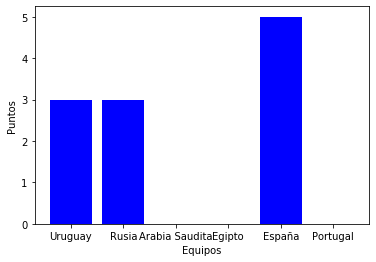

In [165]:
plt.bar(sd['Nombre'], sd['Puntos'], color="blue")
plt.ylabel('Puntos')
plt.xlabel('Equipos')
plt.show()

In [166]:
puntos = df['Puntos'].astype(int).abs()
num_partidos = df['Numero_partidos'].astype(int).abs()

num_partidos

0     3
1     3
2     0
3     0
4     5
5     0
6     5
7     9
8     3
9     2
10    0
11    1
12    8
13    4
14    4
15    6
16    3
17    1
18    0
19    2
20    2
21    7
22    5
23    3
24    3
25    0
26    0
27    3
28    2
29    6
30    4
31    0
Name: Numero_partidos, dtype: int32